In [1]:
import numpy as np 
from scipy import stats
import statsmodels.api as sm 
import pandas as pd
import matplotlib.pylab as plt 
from scipy.stats import skew, kurtosis, norm
import seaborn
%matplotlib inline
from sklearn.linear_model import LinearRegression
from statsmodels.stats.multicomp import MultiComparison
import random



In [2]:
pdPaddle = pd.read_csv("paddle.csv")

pdPaddle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lakes        95 non-null     int64  
 1   pop          95 non-null     int64  
 2   advertising  95 non-null     float64
 3   competitors  95 non-null     int64  
 4   sales        95 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 3.8 KB


In [13]:
model=sm.OLS(pdPaddle['sales'], sm.add_constant(pdPaddle['lakes'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     13.20
Date:                Tue, 02 May 2023   Prob (F-statistic):           0.000459
Time:                        18:30:58   Log-Likelihood:                -295.44
No. Observations:                  95   AIC:                             594.9
Df Residuals:                      93   BIC:                             600.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.6338      1.224     20.120      0.000      22.203      27.065
lakes         -0.9723      0.268     -3.633      0.000      -1.504      -0.441
==============================================================================
Omnibus:                        0.536   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.765   Jarque-Bera (JB):                0.662
Skew:                           0.046   Prob(JB):                        0.718
Kurtosis:                       2.602   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Data and Fit')

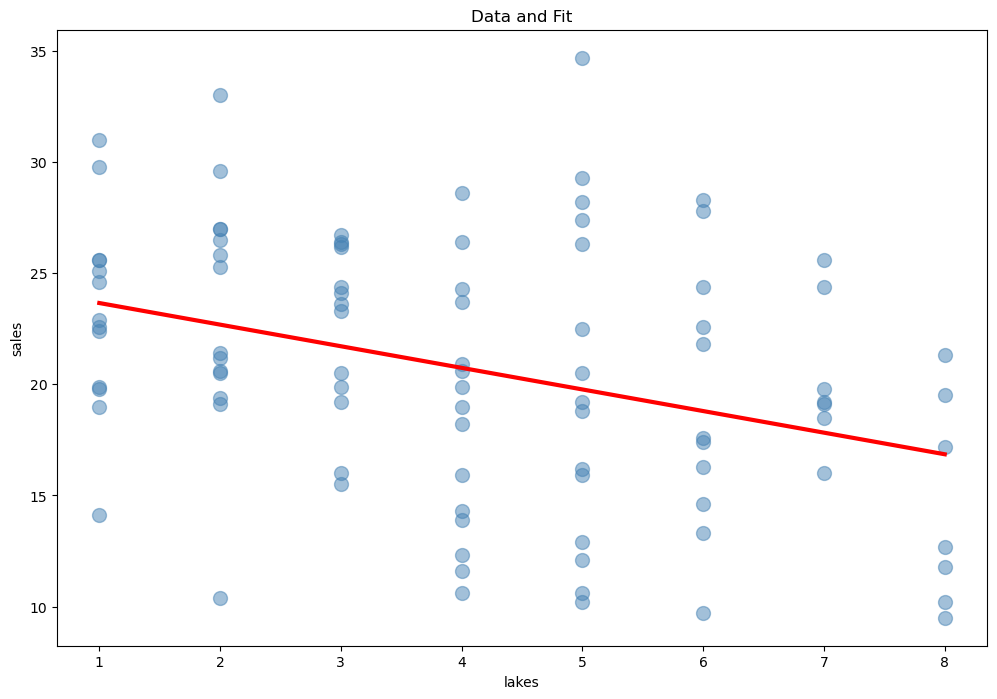

In [4]:
fig, ax= plt.subplots(figsize=(12,8))
ax.scatter(pdPaddle['lakes'], pdPaddle['sales'],color="steelblue", alpha=0.5, s=100)
ax.plot( pdPaddle['lakes'], model.fittedvalues,color='red',lw=3)
ax.set_xlabel('lakes')
ax.set_ylabel('sales')
ax.set_title('Data and Fit')

Text(0.5, 1.0, 'Histogram of Residuals')

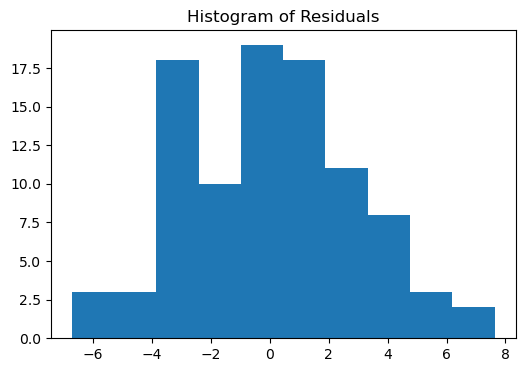

In [9]:
fig, ax= plt.subplots(figsize=(6,4))

ax.hist(model.resid)
ax.set_title('Histogram of Residuals')

Figure(640x480)


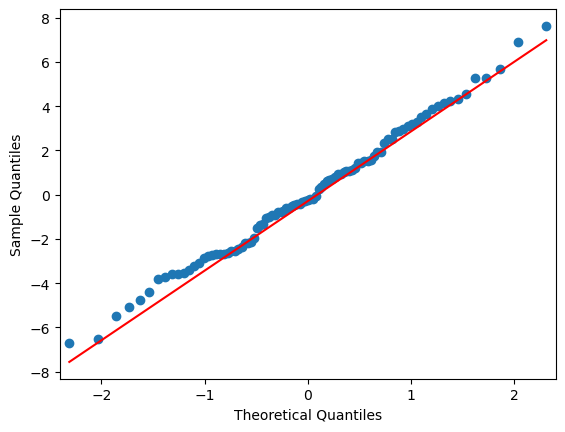

In [10]:
print(sm.qqplot(model.resid,line='q'))

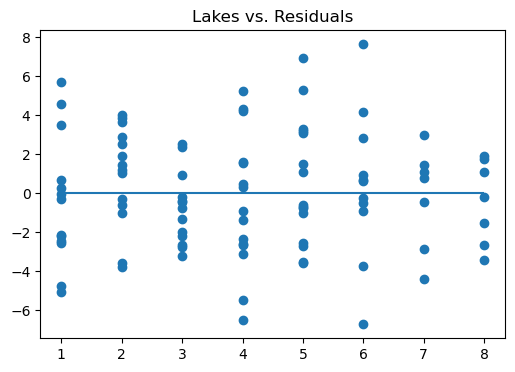

In [11]:
fig, ax= plt.subplots(figsize=(6,4))

ax.scatter(pdPaddle["lakes"], model.resid)
ax.set_title('Lakes vs. Residuals')
ax.hlines(0, xmin=np.min(pdPaddle['lakes']), xmax=np.max(pdPaddle['lakes']))

In [15]:
predictions = model.get_prediction(np.array([1,5,]))

print(predictions.summary_frame(alpha=0.1))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  19.772263  0.615846      18.749095      20.795432     10.606334   

   obs_ci_upper  
0     28.938192  


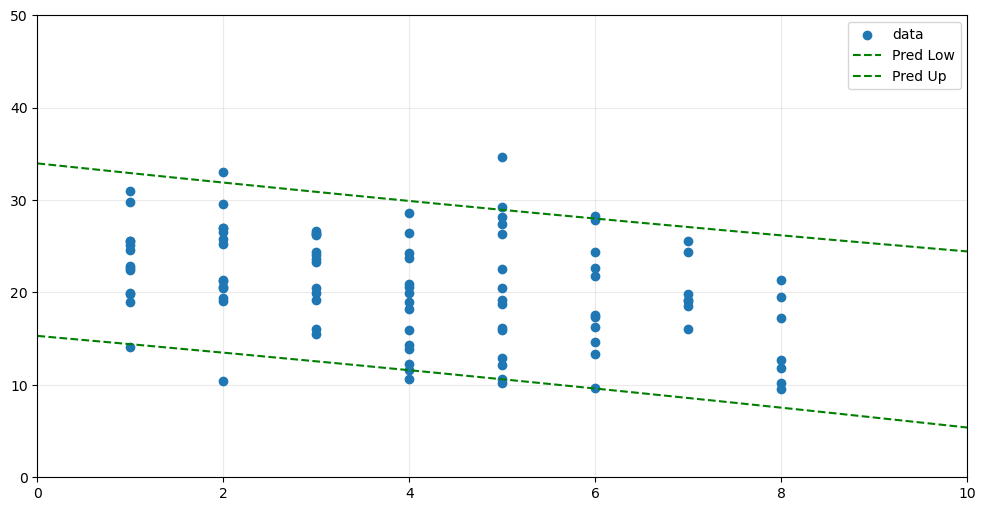

In [19]:
# Inspect the results
xgrd=np.linspace(0,20,1000) #grid for plotting
#find confidence and predictive intervals all over our plot:



predictions = model.get_prediction(sm.add_constant(xgrd))
predmat=predictions.summary_frame(alpha=0.1)


#plot it all
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlim([0,10])
ax.set_ylim([0,50])
plt.scatter(pdPaddle['lakes'], pdPaddle['sales'], label='data')

#Plot each column
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')

plt.legend()


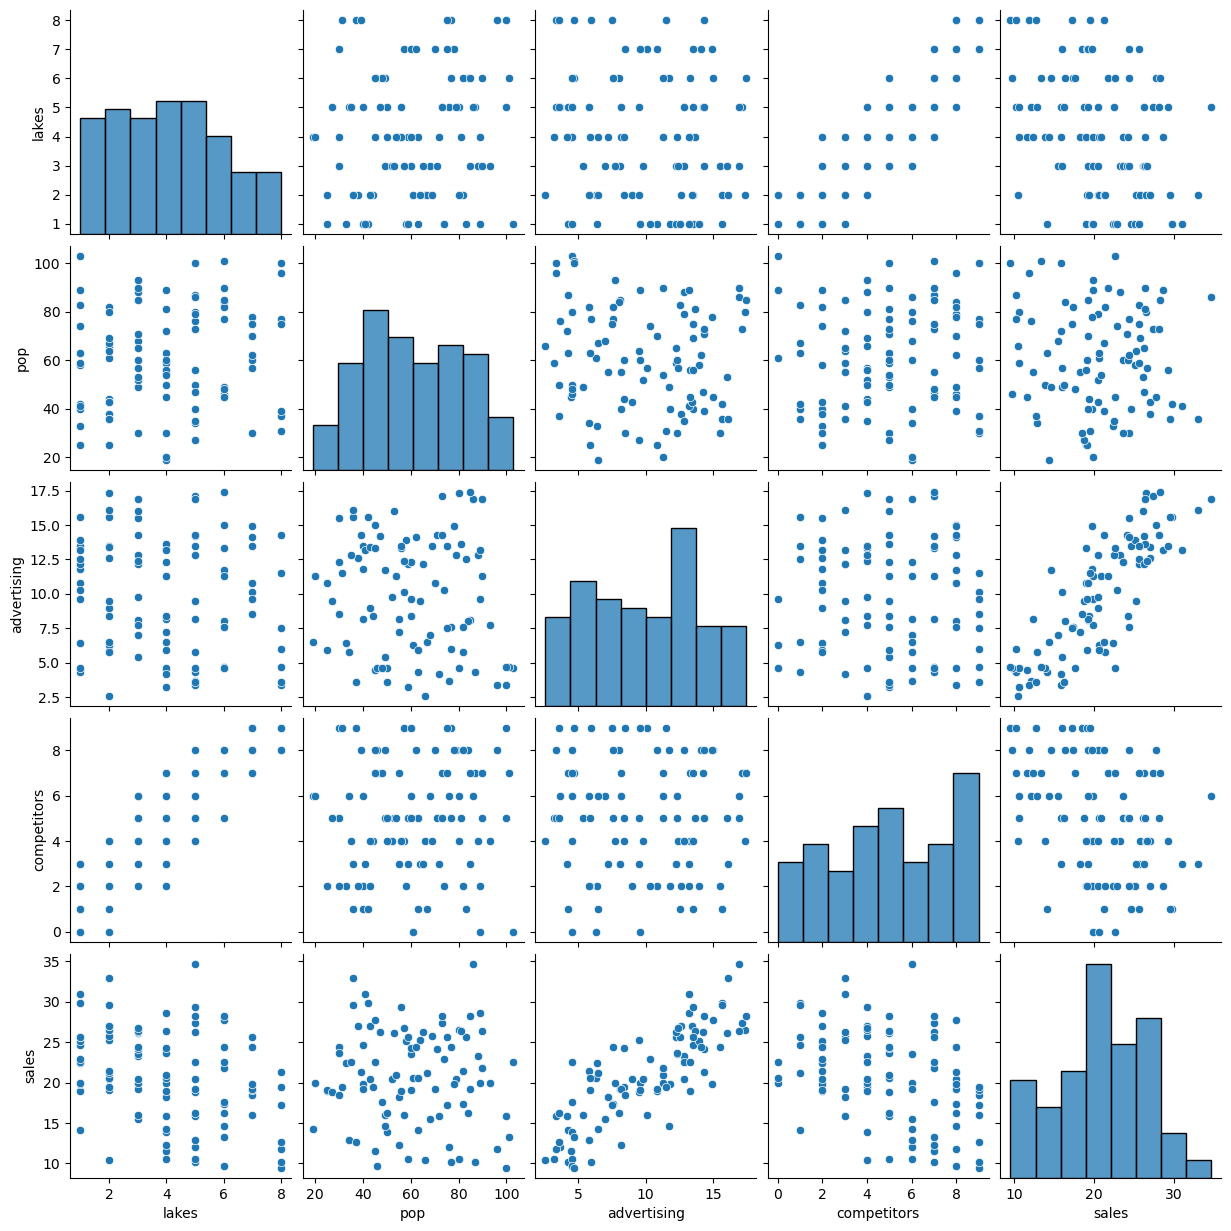

In [5]:
seaborn.pairplot(pdPaddle)

In [6]:
pdPaddle.corr()

,lakes,pop,advertising,competitors,sales
lakes,1.000000,0.138156,-0.128524,0.895413,-0.352528
pop,0.138156,1.000000,-0.114839,0.080539,-0.063142
advertising,-0.128524,-0.114839,1.000000,-0.079184,0.824864
competitors,0.895413,0.080539,-0.079184,1.000000,-0.377028
sales,-0.352528,-0.063142,0.824864,-0.377028,1.000000


In [7]:
# Collect the features
X = pdPaddle[["lakes", "advertising"]]

# Add a constant to the array for the intecept 
X = sm.add_constant(X)

# Collect the response data in an array 
y = pdPaddle["sales"]

# Fit the ordinary least-squares (OLS) model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     132.4
Date:                Tue, 02 May 2023   Prob (F-statistic):           8.31e-28
Time:                        17:58:34   Log-Likelihood:                -237.35
No. Observations:                  95   AIC:                             480.7
Df Residuals:                      92   BIC:                             488.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.4814      1.056     11.816      0.000      10.383      14.579
lakes          -0.6913      0.147     -4.696      0.000      -0.984      -0.399
advertising     1.1101      0.075     14.849      0.000       0.962       1.259
==============================================================================
Omnibus:                        0.577   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.710
Skew:                           0.158   Prob(JB):                        0.701
Kurtosis:                       2.718   Cond. No.                         39.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
fig, ax= plt.subplots(figsize=(6,4))

ax.hist(model.resid)
ax.set_title('Histogram of Residuals')

In [ ]:
print(sm.qqplot(model.resid,line='q'))

In [ ]:
fig, ax= plt.subplots(figsize=(6,4))

ax.scatter(pdPaddle["lakes"], model.resid)
ax.set_title('Lake vs. Residuals')
ax.hlines(0, xmin=np.min(pdPaddle['lakes']), xmax=np.max(pdPaddle['lakes']))

In [ ]:
fig, ax= plt.subplots(figsize=(6,4))

ax.scatter(pdPaddle["advertising"], model.resid)
ax.set_title('Advertising vs. Residuals')
ax.hlines(0, xmin=np.min(pdPaddle['advertising']), xmax=np.max(pdPaddle['advertising']))

In [ ]:
X = pdPaddle[["lakes", "pop", "advertising", "competitors"]]

X = sm.add_constant(X)

y = pdPaddle["sales"]

model = sm.OLS(y, X).fit()

model.summary()

In [ ]:
X = pdPaddle[["lakes", "advertising", "competitors"]]

X = sm.add_constant(X)

y = pdPaddle["sales"]

model = sm.OLS(y, X).fit()

model.summary()

In [ ]:
pdPaddle[["lakes", "advertising", "competitors"]].corr()

In [ ]:
X = pdPaddle[["advertising", "competitors"]]

X = sm.add_constant(X)

y = pdPaddle["sales"]

finalModel = sm.OLS(y, X).fit()

finalModel.summary()

In [ ]:
predictions = finalModel.get_prediction(np.array([1,8, 2]))

print(predictions.summary_frame(alpha=0.05))